<a href="https://colab.research.google.com/github/StuartLiv/CPSC-440-Project/blob/main/v0/shot0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# workflow notebook

Used reference:
-  [git in colab](https://www.geeksforgeeks.org/how-to-install-and-use-git-in-google-colab/)!

# 0. Open ipynb from github
To get this latest notebook from our repo into colab:
> "Open in colab" button == {Download from github} + {Upload to colab} - {Gets saved to drive}

# 1. Set up project in runtime
The following cell runs git config, clones the repo to get datasets as runtime files, and cds into project directory.

In [ ]:
!git config --global user.email "beepboop@gmail.com"
!git config --global user.name "boopbeep"
!git clone https://yourtoken@github.com/StuartLiv/CPSC-440-Project
%cd '/content/CPSC-440-Project'

In [33]:
%pwd

'/content'

`git clone` seems too good to be true for getting a few GB of data into runtime, but `/datasets/` is up once clone is run! See:

In [7]:
import os
path = '/content/CPSC-440-Project/datasets/smallset_onesize/color'
files = os.listdir(path)
print(files)

['2956.jpg', '6652.jpg', '770.jpg', '6300.jpg', '1612.jpg', '2201.jpg', '5003.jpg', '3712.jpg', '4284.jpg', '6107.jpg', '2331.jpg', '577.jpg', '5891.jpg', '5208.jpg', '3384.jpg', '2257.jpg', '5109.jpg', '2884.jpg', '2761.jpg', '1331.jpg', '6876.jpg', '366.jpg', '7038.jpg', '5569.jpg', '1252.jpg', '2112.jpg', '619.jpg', '845.jpg', '3811.jpg', '263.jpg', '1566.jpg', '4599.jpg', '5126.jpg', '3515.jpg', '1091.jpg', '4389.jpg', '732.jpg', '4737.jpg', '1343.jpg', '5510.jpg', '5483.jpg', '5674.jpg', '4292.jpg', '2909.jpg', '1624.jpg', '923.jpg', '5541.jpg', '4096.jpg', '3564.jpg', '4742.jpg', '1231.jpg', '5348.jpg', '5724.jpg', '6788.jpg', '2577.jpg', '6843.jpg', '6721.jpg', '3520.jpg', '2844.jpg', '5177.jpg', '3358.jpg', '2085.jpg', '5158.jpg', '6908.jpg', '655.jpg', '6936.jpg', '3973.jpg', '6419.jpg', '2773.jpg', '3339.jpg', '901.jpg', '4763.jpg', '6947.jpg', '525.jpg', '2858.jpg', '956.jpg', '6338.jpg', '4256.jpg', '240.jpg', '5548.jpg', '3941.jpg', '6213.jpg', '5110.jpg', '355.jpg', '5123

# 2. Preprocess data

Datasets:
- `smallset_onesize`
  - Downloaded as is, [here](https://www.kaggle.com/datasets/theblackmamba31/landscape-image-colorization).
  - 7130 color/gray pairs
  - Res 150x150
  - 0.232GB

In [11]:
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array # TODO don't use keras
import cv2 as cv


''' Returns an array containing all images in folder, sorted by filename. Useful for color/gray/downsize versions in different folders with same filename.
@param path - directory with images
@return
'''
def make_image_arr(path):

  def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

  files = os.listdir(path)
  files = sorted_alphanumeric(files)

  arr = []
  for i in tqdm(files):
    img = cv.imread(path + '/'+i,1)
    img = img.astype('float32') / 255.0
    arr.append(img_to_array(img))

  return arr


In [12]:
color_arr = make_image_arr('/content/CPSC-440-Project/datasets/smallset_onesize/color')

100%|██████████| 7129/7129 [00:08<00:00, 887.99it/s]


In [21]:
gray_arr = make_image_arr('/content/CPSC-440-Project/datasets/smallset_onesize/gray')

100%|██████████| 7129/7129 [00:07<00:00, 968.56it/s] 


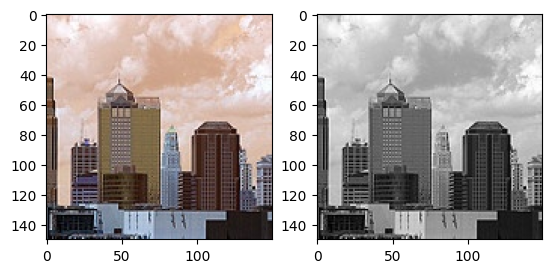

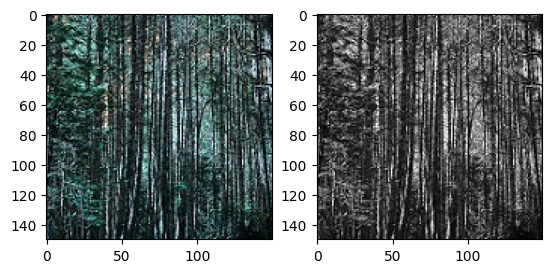

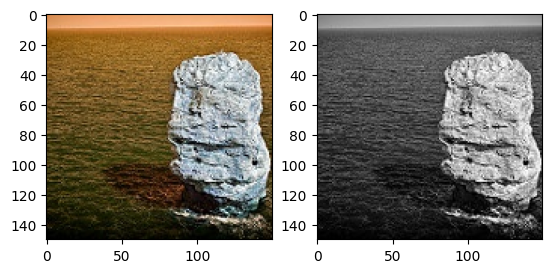

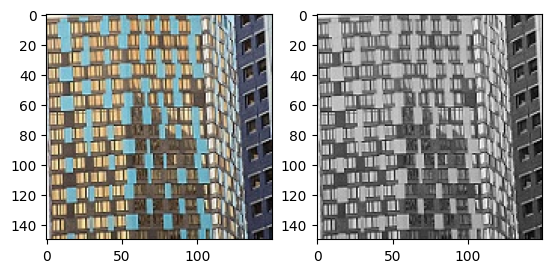

In [29]:
import matplotlib.pyplot as plt
import numpy as np

for i in np.random.randint(len(color_arr),size=4):
  plt.subplot(1,2,1)
  plt.imshow(color_arr[i])
  plt.subplot(1,2,2)
  plt.imshow(gray_arr[i])
  plt.show()

# 3. Saving new model weights to project directory

Toy model generated below:

- does not take our shapes (generator give it `image = torch.randn(1, 3, 224, 224)` :P)
- untrainable but just save it

In [19]:
# prompt: pytorch colourization autoencoder

import torch
import torch.nn as nn
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
# Create the autoencoder
autoencoder = Autoencoder()



In [ ]:
# Load the image
image = gray_arr[0]
print(f'input.shape {image.shape}')
# Colorize the image
colorized_image = autoencoder(image)

# does not work

In [ ]:
torch.save(autoencoder.decoder,'/content/CPSC-440-Project/v0/decoder_weights')

# 4. Push changes

Look for any changes in the project directory, excluding this notebook, and push them.


In [ ]:
!git add .

In [ ]:
!git status

In [ ]:
!git commit -m "Message here"

In [ ]:
!git push

# 5. Save notebook

Commiting this notebook requires a special maneuver:

> File > Save a copy in github > enter original `path` + new commit msg

That's it!